In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the Dataset
# Load the CSV file that was uploaded
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Shape
customer_data.shape


(200, 5)

In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Checking the null values

customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Select relevant features for clustering
features = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
# 3. Show the correlation matrix for numerical features
correlation_matrix = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


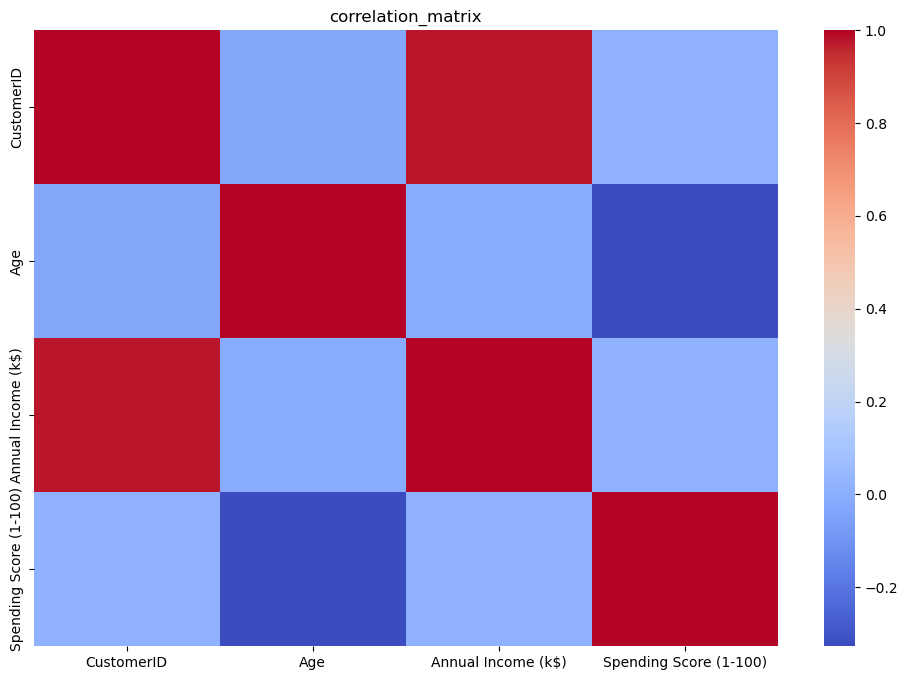

In [9]:
# Drop non-numeric columns before computing the correlation matrix
numeric_columns = customer_data.select_dtypes(include=[np.number])

# Visualize the correlation matrix using only the numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
plt.title('correlation_matrix')
plt.show()

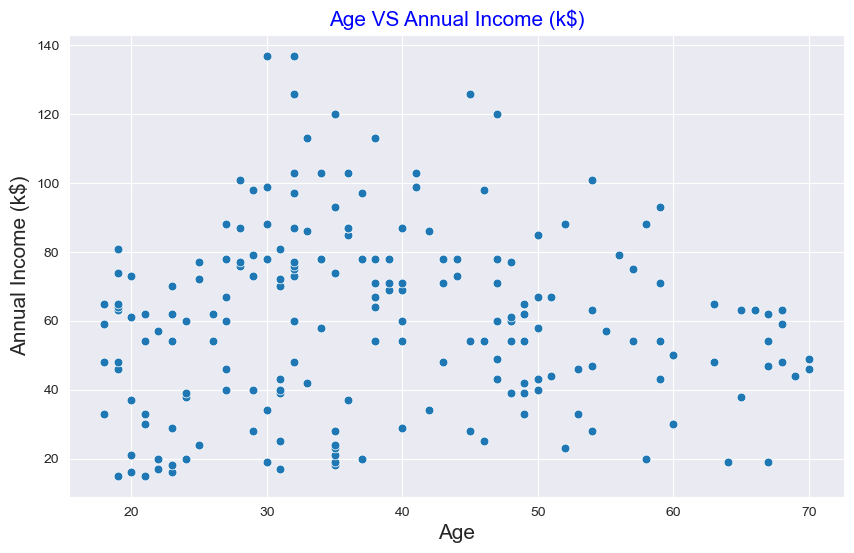

In [41]:
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=customer_data, x="Age", y= "Annual Income (k$)", s=40)
plt.title("Age VS Annual Income (k$)", fontsize=15, color="blue")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

C:\Users\lmibh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lmibh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lmibh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lmibh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

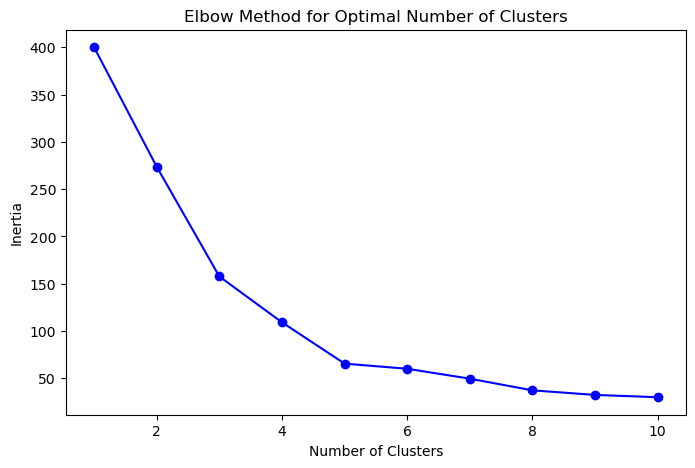

In [13]:
import os
# Set the environment variable to avoid the memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

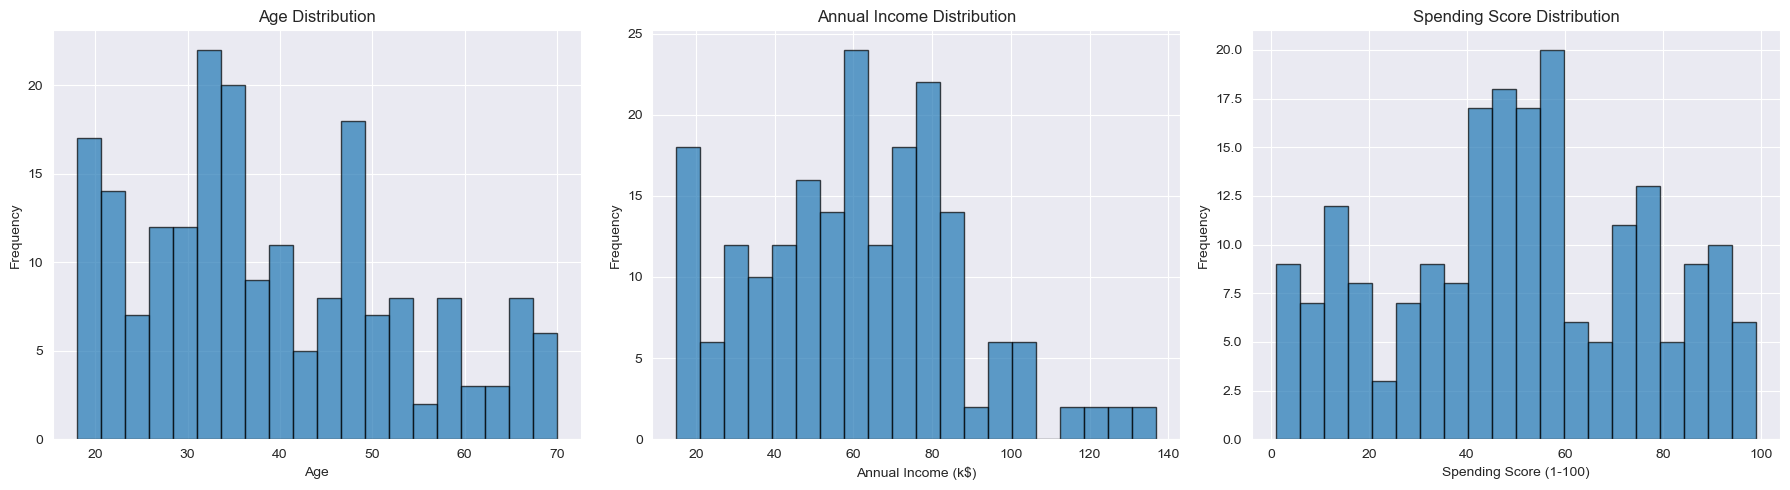

In [23]:


# Plot histograms for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
axes[0].hist(customer_data['Age'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Annual Income distribution
axes[1].hist(customer_data['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Annual Income Distribution')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')

# Spending Score distribution
axes[2].hist(customer_data['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7)
axes[2].set_title('Spending Score Distribution')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


- Age Distribution: The ages of customers seem to be fairly spread out, with a slight concentration around the younger age groups.

- Annual Income Distribution: The annual income is evenly distributed, indicating a diverse range of customers in terms of their income levels.

- Spending Score Distribution: The spending scores have a more uniform spread, implying varied spending behavior among the customers.

<Figure size 1000x600 with 0 Axes>

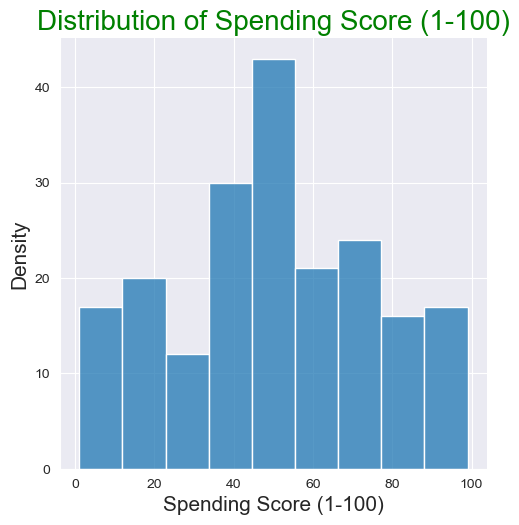

In [21]:
# Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.displot(customer_data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)", fontsize=20, color="green")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

- There seems to be a concentration of customers around scores of 40 and 60, which could indicate average spenders.